## Exploring Why Civil Resistance Works

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
filepath = 'data/WCRWreplication.dta'
data = pd.read_stata(filepath)

In [3]:
data.shape

(323, 85)

In [4]:
data.columns

Index(['defect', 'outcome', 'peakmembership', 'eyear', 'byear', 'location',
       'campaign', 'target', 'lccode', 'tccode', 'nonviol', 'viol', 'fselfdet',
       'regchange', 'secession', 'other', 'success', 'limited', 'failure',
       'ongoing', 'middleeast', 'americas', 'asia', 'fsu', 'europe', 'africa',
       'lpolity', 'tpolity', 'lgovcap', 'tgovcap', 'regviol', 'violsim',
       'extfor', 'statesup', 'regaid', 'sdirect', 'deltatpolity', 'deltatgdp',
       'lduration', 'lmembers', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8',
       't9', 't10', 't11', 'cw', 'postcw', 'ixnNVmem', 'rgdppc',
       'growthrgdppc', 'lupop', 'recur5', 'recur10', 'polityt10', 'polityt1',
       'polityt5', 'politychanget10', 'politychanget1', 'politychanget5',
       'politychanget0', 'authdum', 'deltatgovcap', 'memdum', 'lnpop',
       'ixnNVpc', 'lpolity1', 'lcinc1', 'lgdppc', 'wars', 'lmtnest', 'ef',
       'loclpolity1', 'loclcap1', 'loclcap2', 'loclcap3', 'loclcap4', 'mempc',
       'demdum',

### Question 1

In [5]:
violgroup = data.groupby(['eyear', 'viol']).count()
violgroup.reset_index(inplace=True)

#maybe this is not needed
nonviolgroup = data.groupby(['eyear', 'nonviol']).count()
nonviolgroup.reset_index(inplace=True)

In [6]:
violent = violgroup.loc[violgroup.viol == 1]
nonviolent = violgroup.loc[violgroup.viol == 0]

In [7]:
nonviolent.head()

,eyear,viol,defect,outcome,peakmembership,byear,location,campaign,target,lccode,...,lmtnest,ef,loclpolity1,loclcap1,loclcap2,loclcap3,loclcap4,mempc,demdum,recur1
11,1919,0,1,1,1,1,1,1,1,1,...,0,0,1,1,1,1,1,0,1,0
16,1923,0,1,1,0,1,1,1,1,1,...,0,0,1,1,1,1,1,0,1,0
23,1931,0,1,1,0,1,1,1,1,1,...,0,0,1,1,1,1,1,0,1,0
30,1944,0,4,4,2,4,4,4,4,4,...,0,0,2,2,2,2,2,0,3,0
32,1945,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0


In [8]:
violdec = violent.groupby((violent.eyear//10)*10).sum()
nonvioldec = nonviolent.groupby((nonviolent.eyear//10)*10).sum()

In [9]:
nonvioldec

,eyear,viol,defect,outcome,peakmembership,byear,location,campaign,target,lccode,...,lmtnest,ef,loclpolity1,loclcap1,loclcap2,loclcap3,loclcap4,mempc,demdum,recur1
eyear,,,,,,,,,,,,,,,,,,,,,
1910,1919,0,1,1,1,1,1,1,1,1,...,0,0,1,1,1,1,1,0,1,0
1920,1923,0,1,1,0,1,1,1,1,1,...,0,0,1,1,1,1,1,0,1,0
1930,1931,0,1,1,0,1,1,1,1,1,...,0,0,1,1,1,1,1,0,1,0
1940,3889,0,5,5,3,5,5,5,5,5,...,0,0,2,2,2,2,2,0,4,0
1950,11733,0,9,9,5,9,9,9,9,9,...,6,6,6,5,5,5,5,3,7,7
1960,9821,0,7,7,5,7,7,7,7,7,...,5,5,6,5,5,5,5,4,7,5
1970,9867,0,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,6,6,7
1980,17861,0,32,32,22,32,32,32,32,32,...,28,28,28,28,28,28,28,18,32,28
1990,15952,0,23,23,19,23,23,23,23,23,...,17,17,18,17,17,17,17,18,23,18


Text(0, 0.5, 'campaigns')

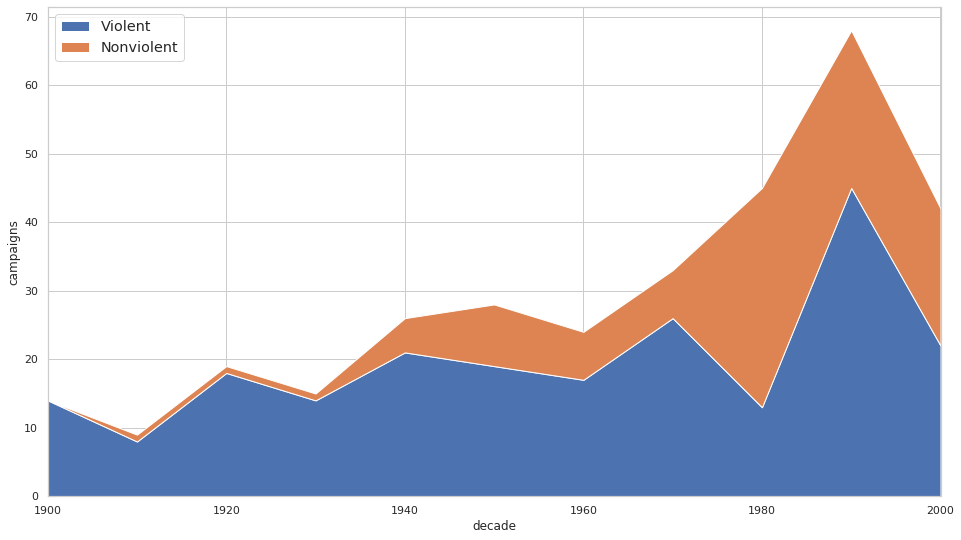

In [10]:
ion = np.insert(nonvioldec.outcome.values, 0, 10)
# ion
# violdec.outcome.values

sns.set(style="whitegrid")
ion = np.insert(nonvioldec.outcome.values, 0, 0) #no data on it?
nonvioldec.index.shape
plt.figure(figsize=(16,9))
plt.stackplot(violdec.index, violdec.outcome.values, ion, labels=['Violent', 'Nonviolent'])
plt.legend(loc='upper left', fontsize = 'large')
plt.xlim(1900, 2000)
plt.xlabel('decade')
plt.ylabel('campaigns')

### Question 2

In [11]:
# get the values from 1940 and after
x = nonvioldec.index[3:]
y1 = nonvioldec.outcome.values[3:]

In [12]:
non = data.loc[(data.viol == 0) & (data.outcome == 5)]
group = non.groupby('eyear').count()
group.reset_index(inplace=True)
groupdec = group.groupby((group.eyear//10)*10).sum()
groupdec[3:6]

,eyear,defect,outcome,peakmembership,byear,location,campaign,target,lccode,tccode,...,lmtnest,ef,loclpolity1,loclcap1,loclcap2,loclcap3,loclcap4,mempc,demdum,recur1
eyear,,,,,,,,,,,,,,,,,,,,,
1950,5874,3,3,0,3,3,3,3,3,3,...,1,1,1,1,1,1,1,0,2,2
1960,3923,3,3,2,3,3,3,3,3,3,...,2,2,2,2,2,2,2,2,3,2
1970,5926,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,3,4


In [13]:
nonvioldec[4:7]

,eyear,viol,defect,outcome,peakmembership,byear,location,campaign,target,lccode,...,lmtnest,ef,loclpolity1,loclcap1,loclcap2,loclcap3,loclcap4,mempc,demdum,recur1
eyear,,,,,,,,,,,,,,,,,,,,,
1950,11733,0,9,9,5,9,9,9,9,9,...,6,6,6,5,5,5,5,3,7,7
1960,9821,0,7,7,5,7,7,7,7,7,...,5,5,6,5,5,5,5,4,7,5
1970,9867,0,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,6,6,7


In [14]:
perc = groupdec/nonvioldec

In [15]:
perc.outcome

eyear
1910         NaN
1920    1.000000
1930    1.000000
1940    0.400000
1950    0.333333
1960    0.428571
1970    0.571429
1980    0.531250
1990    0.521739
2000    0.700000
Name: outcome, dtype: float64

In [16]:
# get the values from 1940 and after
y2 = perc.outcome.values[3:]

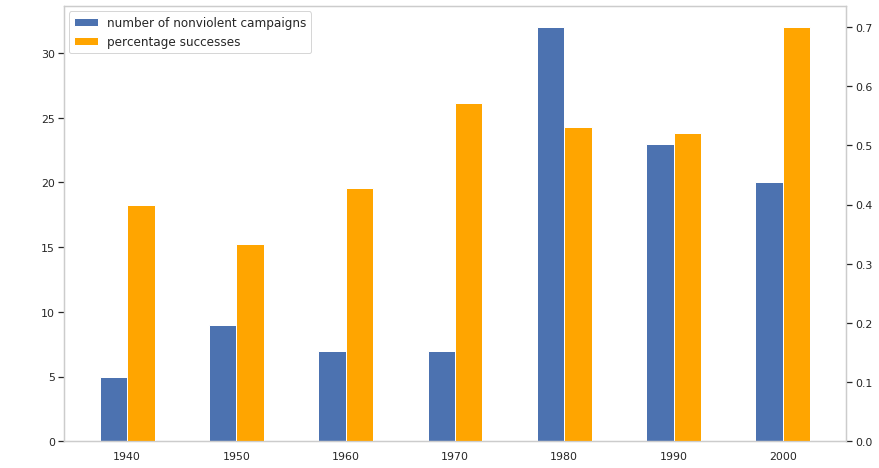

In [17]:
width = 2.5  # the width of the bars

fig = plt.figure(figsize=[14,8])
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
number = ax1.bar(x - width/2, y1, width, color='b', label='number of nonviolent campaigns')
ax1.grid(False)
percentage = ax2.bar(x + width/2, y2, width, color='orange', label='percentage successes')
ax2.grid(False)

fig.legend(bbox_to_anchor=(0.0623, 0.803), loc='upper left', fontsize=12)

#How do I do the legend appending?
# axs = number+percentage
# labs = [l.get_label() for l in axs]
# ax1.legend(axs, labs, loc=0)

## We only need to calculate the percentages for the violent campaigns

In [18]:
vio = data.loc[(data.viol == 1) & (data.outcome == 5)]
group = vio.groupby('eyear').count()
group.reset_index(inplace=True)
groupdec2 = group.groupby((group.eyear//10)*10).sum()
groupdec2[3:6]

,eyear,defect,outcome,peakmembership,byear,location,campaign,target,lccode,tccode,...,lmtnest,ef,loclpolity1,loclcap1,loclcap2,loclcap3,loclcap4,mempc,demdum,recur1
eyear,,,,,,,,,,,,,,,,,,,,,
1930,3871,2,2,2,2,2,2,2,2,2,...,0,0,2,2,2,2,2,0,2,0
1940,5837,7,7,5,7,7,7,7,7,7,...,3,2,5,5,5,5,5,0,6,5
1950,7821,7,7,5,7,7,7,7,7,7,...,3,3,3,3,3,3,3,5,6,4


In [19]:
vioperc = groupdec2/violdec

In [20]:
x = vioperc.index[4:]
y1 = vioperc.outcome.values[4:]
y2 = perc.outcome.values[3:]
y1

array([0.33333333, 0.36842105, 0.23529412, 0.38461538, 0.38461538,
       0.26666667, 0.13636364])

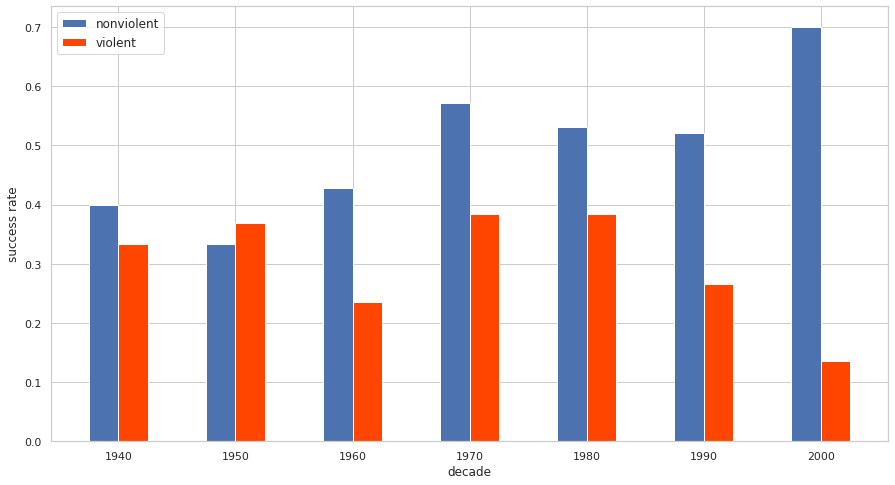

In [21]:
width = 2.5  # the width of the bars

fig = plt.figure(figsize=[15,8])
ax = fig.add_subplot(111)
b2 = ax.bar(x + width/2, y1, width, color='orangered')
b1 = ax.bar(x - width/2, y2, width, color='b')

plt.xlabel('decade')
plt.ylabel('success rate')
ax.legend((b1[0], b2[0]), ('nonviolent', 'violent'), fontsize=12)


## Question 4

Create a table with the twenty-five largest resistance campaigns, for all years, based on their number of members at highest point (peak membership). The table should include the membership, the start year, the end year, the location, the target, whether it was violent or not, and whether it was successful or not. Notice if you find anything about Greece.

In [22]:
peakcamp = data.loc[:, ['peakmembership', 'eyear', 'byear', 'location', 'target']]

peakcamp.sort_values(by='peakmembership', ascending=False)[:25]

,peakmembership,eyear,byear,location,target
257,4500000.0,1945,1937,China,Japanese occupation
206,2000000.0,1979,1977,Iran,Shah Reza Pahlavi
311,2000000.0,1983,1986,Philippines,Ferdinand Marcos
289,1000000.0,1988,1988,Burma,military junta
265,1000000.0,1989,1989,China,Communist regime
262,1000000.0,1968,1967,China,anti-Maoists
255,1000000.0,1949,1922,China,Kuomintang regime
10,1000000.0,2006,2006,Mexico,Calderon regime
228,1000000.0,2005,2005,Lebanon,Syrian forces
141,1000000.0,1999,1993,Nigeria,Military rule


## Question 5

Examine the effect of participation on the probability of campaign success. You should run a logistic regression for success on membership per capita, controlling for the location’s logged population the year the campaign ends. Explain your results.

Having done that, create a scatter plot showing the logged participants per capita, on the 𝑥
axis, and the probability of success, on the 𝑦 axis. 

In [23]:
clear_data = data.loc[data.mempc.notna()]

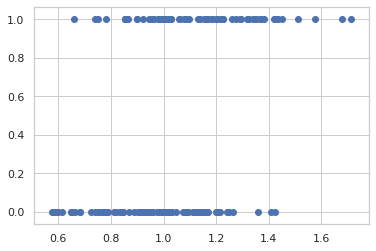

In [24]:
plt.scatter(data.mempc, data.success)

Let's explore our target value and visualize it

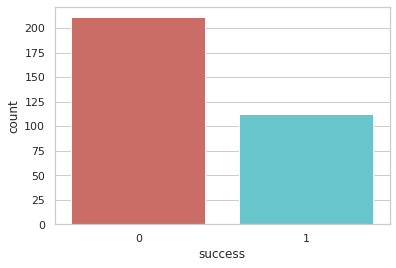

In [25]:
data.success.value_counts()
sns.countplot(x = 'success', data = data, palette = 'hls')
plt.show()

We apply binary logistic regression since the dependent variable is binary.

In [162]:
from statsmodels.formula.api import logit

success_mod = logit("success ~ mempc + lnpop", clear_data).fit()
success_mod.summary2()

Optimization terminated successfully.
         Current function value: 0.594790
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.129     
Dependent Variable: success          AIC:              199.9014  
Date:               2019-11-24 18:24 BIC:              209.1827  
No. Observations:   163              Log-Likelihood:   -96.951   
Df Model:           2                LL-Null:          -111.35   
Df Residuals:       160              LLR p-value:      5.5508e-07
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -5.8199    1.9207  -3.0301  0.0024  -9.5843  -2.0555
mempc          4.4892    0.9857   4.5545  0.0000   2.5573   6.4210
lnpop          0.0907    0.1285   0.7058  0.4803  -0.1612   0.3426
=================================================================

"""

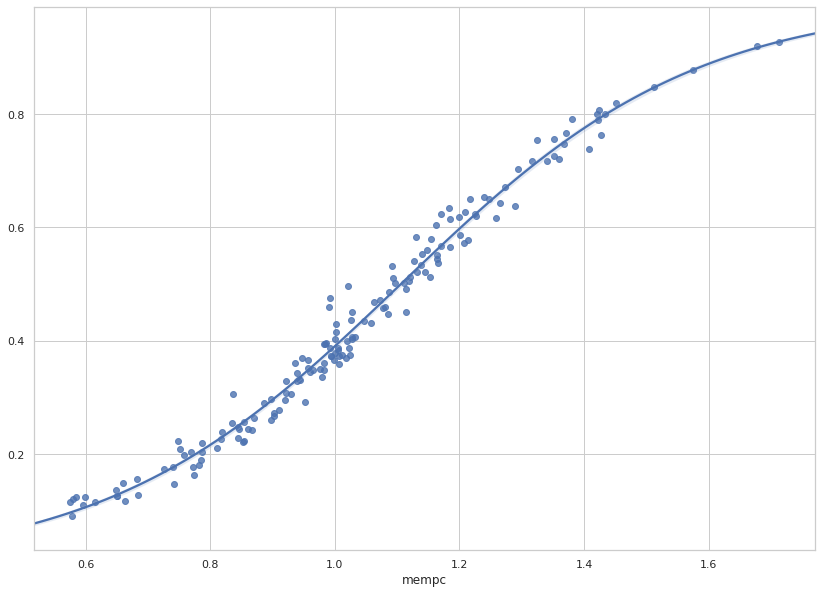

In [163]:
X = clear_data[['mempc' , 'lnpop']]
y = success_mod.predict(X)
x = X.iloc[:, 0]
plt.figure(figsize=[14,10])
# plt.scatter(x,y)
sns.regplot(x, y, data=data, logistic=True)

The intercept is the log odds of succeding when all the independent variables are held at zero; that is . That means that 

In [164]:
import math

In [165]:
0.002/1.002

0.001996007984031936

In [166]:
math.exp(-5.8199)

0.0029679019201339445

In [167]:
math.exp(-4.48)

0.011333413154667387

Here I have to explain what I see

Explain the result due to the mathematical typo

* That means that the logistic regression model is:

$$ log\frac{p}{1 - p}  = \beta_0 + \beta_1 x$$

* And we have, solving for $p(x)$:

$$ p(x) = \frac {1}{1+e^{-(\beta_0 + \beta_1 x)}} $$

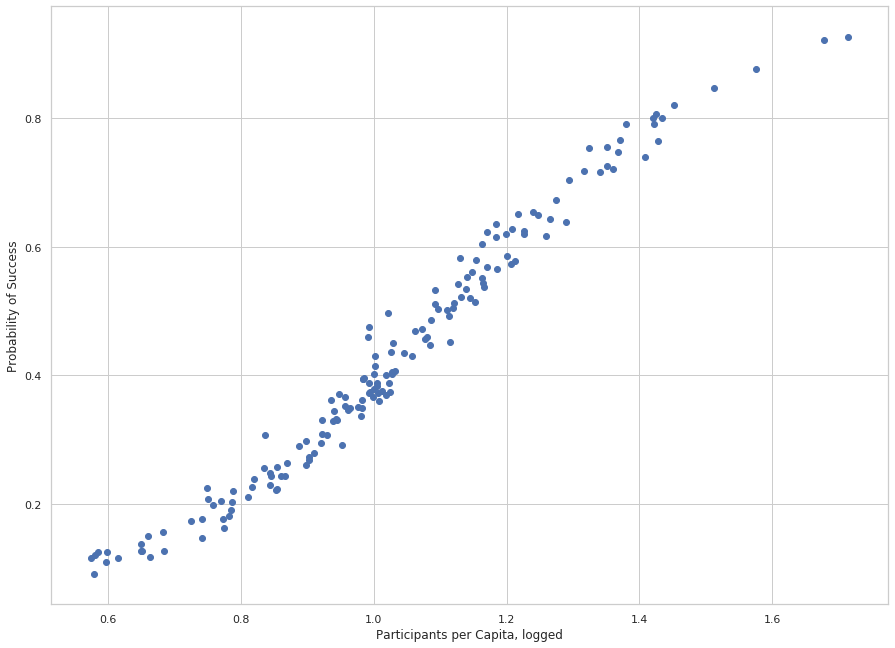

In [168]:
# y = 1 / (1 + np.exp(-x))

x = clear_data.mempc
y = 1/(1+ np.exp(-success_mod.fittedvalues))
fig = plt.figure(figsize=[15,11])
ax = fig.subplots()
ax.set_xlabel('Participants per Capita, logged')
ax.set_ylabel('Probability of Success')
ax.scatter(x,y)

In [169]:
10**data.mempc.max()

51.75073712346991

In [170]:
#we have 160 records with missing values
data.mempc.isnull().sum()

160

We can calculate the probability of success beforehand

In [171]:
data.success.sum()/data.success.count()

0.34674922600619196

### QUESTION 6

From the results you obtained in the previous question, find the percentage of the population that is the tipping point for success in a campaign.

Since we want to calculate the percentage of the population that is the tipping point for success, we can turn this question into a classification problem. In this problem, we are looking to classify the percentage of populations (mempc) to either successfull of not. 

After that, we have to conclude to a threshold that always classifies the non successful campaigns correctly.

In other words, I am looking for a high threshold with **0 False Positives** and **maximum True Positives**. Note here that a high threshold:

* Decreases the number of False Possitives (that's what I want)
* Increases the number of False Negatives (I don't care If I classify a campaign as no successful and in the end it was successful)

Thus, we will do a Logistic Regression with sklearn in order to find the ROC curve

In [172]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

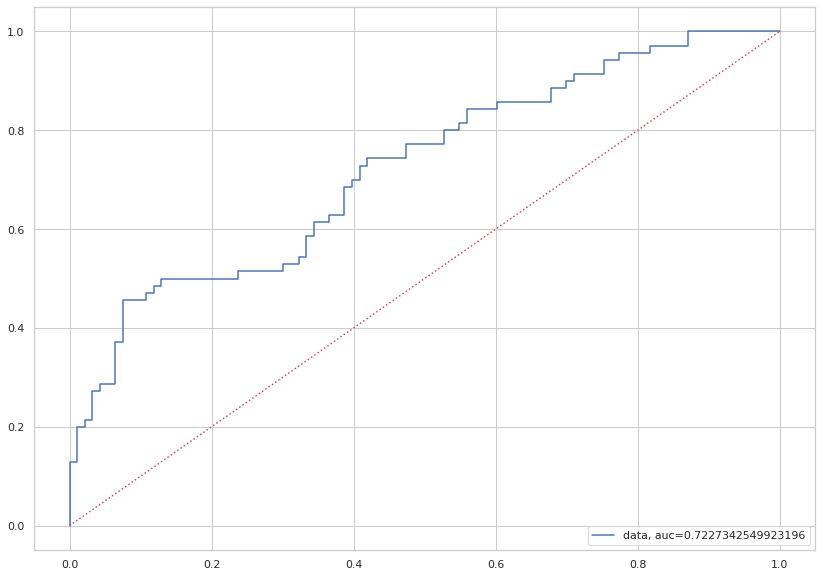

In [173]:
y_pred_proba = success_mod.predict()
fpr, tpr, thresholds = metrics.roc_curve(clear_data.success,  success_mod.predict(X))
auc = metrics.roc_auc_score(clear_data.success, success_mod.predict(X))
plt.figure(figsize=[14,10])
plt.plot(fpr,tpr,label="data, auc="+str(auc))
z = np.linspace(0, 1, 1000)
plt.plot(z, z, ':r')
plt.legend(loc=4)
plt.show()

In [174]:
frame = { 'fpr': fpr, 'tpr': tpr, 'thresholds' : thresholds }

In [175]:
results = pd.DataFrame(frame)

In [176]:
results

,fpr,tpr,thresholds
0,0.000000,0.000000,1.927019
1,0.000000,0.014286,0.927019
2,0.000000,0.128571,0.791073
3,0.010753,0.128571,0.790409
4,0.010753,0.200000,0.747059
...,...,...,...
61,0.817204,0.957143,0.189858
62,0.817204,0.971429,0.181065
63,0.870968,0.971429,0.155638
64,0.870968,1.000000,0.146914


In [177]:
result = results.loc[results.fpr == 0]

In [178]:
result = result.loc[result.tpr == result.tpr.max()]

In [179]:
newThresh = result[['thresholds']].values

So the threshold is 1.92 or 0.92 since threshold adds 1 to the first value of the array. So back to the S curve diagram...

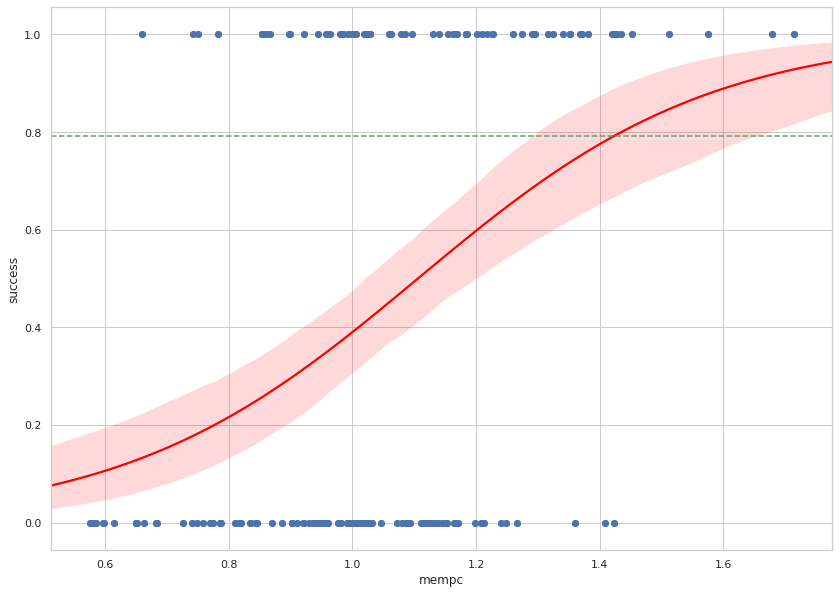

In [180]:
X = clear_data[['mempc' , 'lnpop']]
y = clear_data.success
x = X.iloc[:, 0]
plt.figure(figsize=[14,10])
plt.scatter(x,y)
sns.regplot(x, y, line_kws={'color': 'red'},data=data, logistic=True)
plt.axhline(y=newThresh, color='g', linestyle='--')

We can't use data with missing values, so we drop them.

In [42]:
clear_data = data.loc[data.mempc.notna()]

The regression will have as independant variables **mempc** and **lnpop** and as binary dependant variable **success**

In [43]:
X = clear_data[['mempc' , 'lnpop']]
y = clear_data.success
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [44]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

/home/ion/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

/home/ion/.local/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


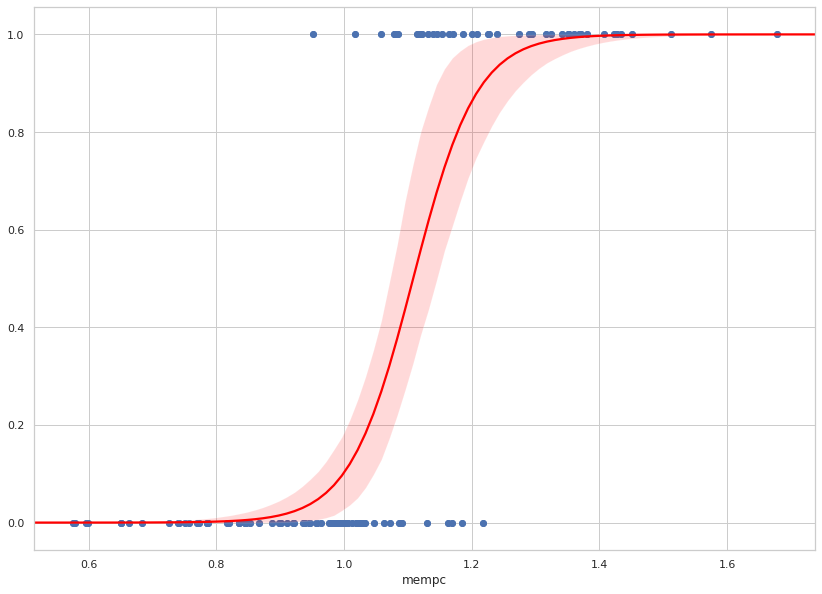

In [45]:
y = clf.predict(X_train)
x = X_train.iloc[:, 0]
plt.figure(figsize=[14,10])
plt.scatter(x,y)
sns.regplot(x, y, line_kws={'color': 'red'},data=data, logistic=True)

In [46]:
y_pred = clf.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[21,  9],
       [13,  6]])

Text(0.5, 257.44, 'Predicted label')

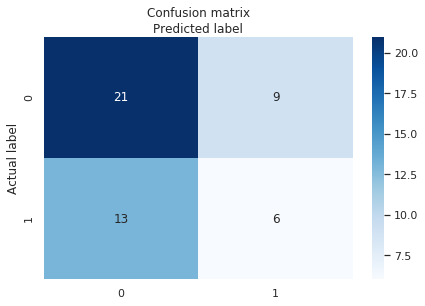

In [47]:
fig, ax = plt.subplots()
class_names = ['success', 'no success']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [48]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.5510204081632653
Precision: 0.4
Recall: 0.3157894736842105


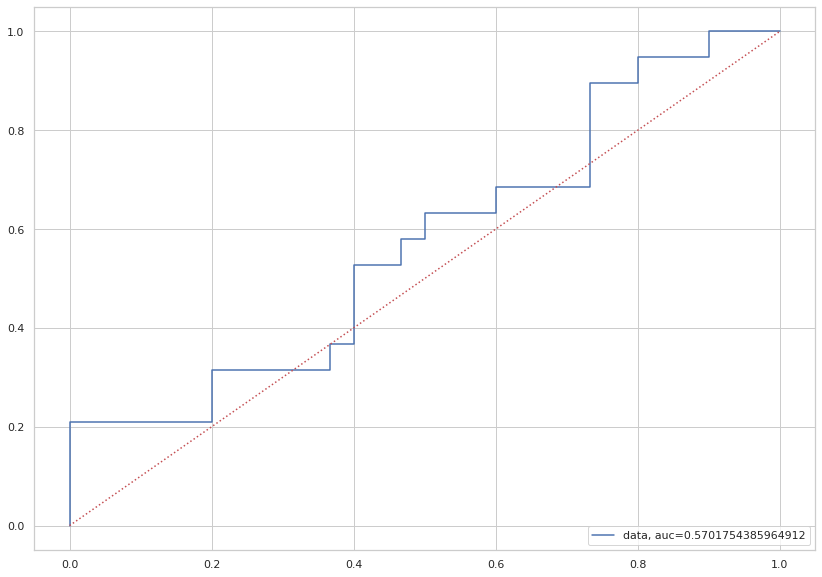

In [49]:
y_pred_proba = clf.predict_proba(X_test)[::, 1]
# y_pred_proba
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=[14,10])
plt.plot(fpr,tpr,label="data, auc="+str(auc))
z = np.linspace(0, 1, 1000)
plt.plot(z, z, ':r')
plt.legend(loc=4)
plt.show()

In [50]:
thresholds.max()

1.8319327617365981

The **ROC** graph summarizes all of the confusion matrices that each threshold produced

In [51]:
thresholds

array([1.83193276, 0.83193276, 0.64814451, 0.57455531, 0.53130392,
       0.48494849, 0.4785125 , 0.46629097, 0.44887535, 0.43381985,
       0.43353797, 0.42937914, 0.42398353, 0.41129393, 0.40113737,
       0.39336492, 0.3639317 , 0.35041862, 0.33634864, 0.20031883,
       0.18295636, 0.12964225])

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

In [63]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

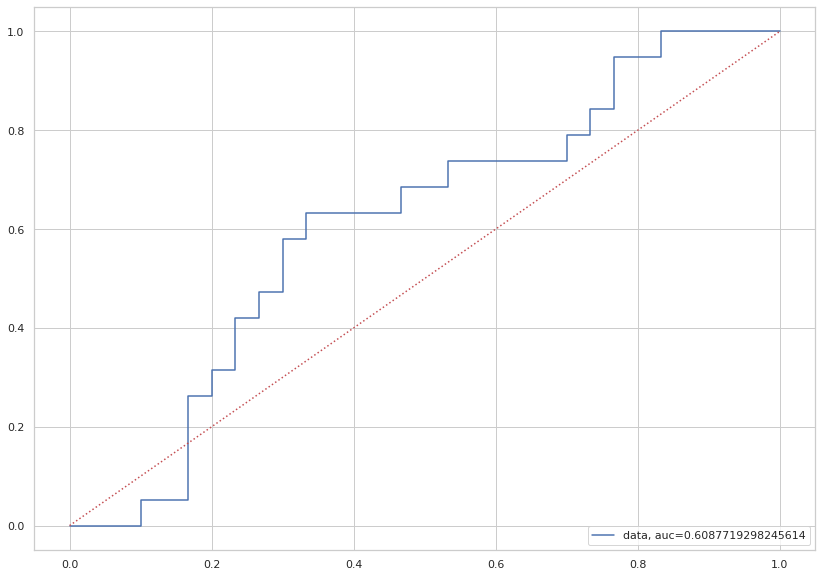

In [64]:
y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=[14,10])
plt.plot(fpr,tpr,label="data, auc="+str(auc))
z = np.linspace(0, 1, 1000)
plt.plot(z, z, ':r')
plt.legend(loc=4)
plt.show()

In [65]:
thresholds

array([1.81306159, 0.81306159, 0.72404072, 0.71739992, 0.7154996 ,
       0.67901486, 0.58204862, 0.52423138, 0.51126987, 0.47516129,
       0.47159471, 0.4715705 , 0.46855872, 0.43055979, 0.42309555,
       0.42050296, 0.41146306, 0.40844753, 0.40521676, 0.39985176,
       0.35211256, 0.35115027, 0.34175595, 0.33969236, 0.32762414,
       0.28673963, 0.24961495, 0.2304925 , 0.17510109, 0.16538512])

## Question 7

In [159]:
success_mod = logit("success ~ nonviol + tpolity + lnpop + lmembers", clear_data).fit()
success_mod.summary2()

Optimization terminated successfully.
         Current function value: 0.567143
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.163     
Dependent Variable: success          AIC:              169.9344  
Date:               2019-11-24 18:18 BIC:              184.6782  
No. Observations:   141              Log-Likelihood:   -79.967   
Df Model:           4                LL-Null:          -95.506   
Df Residuals:       136              LLR p-value:      2.9528e-06
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -0.1085    1.4130  -0.0768  0.9388  -2.8779   2.6609
nonviol        0.9048    0.4636   1.9517  0.0510  -0.0038   1.8134
tpolity        0.0520    0.0298   1.7439  0.0812  -0.0064   0.1104
lnpop         -0.4363    0.1423  -3.0671  0.0022  -0.7151  -0.1575
lmembers       0.3751    0.1282   2.9264  0.0034   0.1239   0.6263
=================================================================

"""

In [211]:
success_mod = logit("success ~ nonviol + americas + asia + africa + europe + fsu + middleeast", data).fit()
success_mod.summary2()

Optimization terminated successfully.
         Current function value: 0.591713
         Iterations 5


/home/ion/.local/lib/python3.6/site-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/home/ion/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/ion/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/ion/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.083     
Dependent Variable: success          AIC:              396.2465  
Date:               2019-11-24 19:01 BIC:              422.6901  
No. Observations:   323              Log-Likelihood:   -191.12   
Df Model:           6                LL-Null:          -208.47   
Df Residuals:       316              LLR p-value:      4.9505e-06
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
              Coef.    Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Intercept    -0.9785        nan      nan      nan      nan      nan
nonviol       1.2582     0.2648   4.7515   0.0000   0.7392   1.7771
americas      0.3016        nan      nan      nan      nan      nan
asia         -0.4977        nan      nan      nan      nan      nan
africa        0.2647        nan      nan      nan      nan      nan
europe       -0.2938        nan      nan      nan      nan      nan
fsu           0.0056        nan      nan      nan      nan      nan
middleeast   -0.7589        nan      nan      nan      nan      nan
=================================================================

"""